# Visualize Cytomining Ecosystem Software Landscape

Visualizations related to Cytomining ecosystem software landscape analysis.

## Plot Foci

- User base size
- Usage
- Maturity

In [1]:
import os
import random
from datetime import datetime

import pandas as pd
import plotly.colors as pc
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import pytz
from box import Box
from plotly.offline import plot
from plotly.subplots import make_subplots

# set plotly default theme
pio.templates.default = "simple_white"

# get the current datetime
tz = pytz.timezone("UTC")
current_datetime = datetime.now(tz)

# set common str's
title_prefix = "Cytomining Ecosystem Software Landscape Analysis"

# export locations relative to this notebook
export_dir = "../../docs/reports/cytomining-ecosystem/"

In [2]:
# read in target project data
projects = Box.from_yaml(filename="data/target-projects.yaml").projects
df_ref_projects = pd.DataFrame(projects)
# statically set a single category
df_ref_projects["category"] = df_ref_projects["category"].str[0]
df_ref_projects.head()

,homepage_url,name,repo_url,category
0,https://pycytominer.readthedocs.io/en/latest/,pycytominer,https://github.com/cytomining/pycytominer,loi-focus
1,https://cytosnake.readthedocs.io/en/latest/,cytosnake,https://github.com/WayScience/CytoSnake,loi-focus
2,https://cytomining.github.io/CytoTable/,cytotable,https://github.com/cytomining/CytoTable,loi-focus
3,https://github.com/WayScience/IDR_stream,IDR_Stream,https://github.com/WayScience/IDR_stream,loi-focus
4,https://pandas.pydata.org/,Pandas,https://github.com/pandas-dev/pandas,cytomining-ecosystem-relevant-open-source


In [3]:
# read in project metric data
df_projects = pd.read_parquet("data/project-github-metrics.parquet")
df_projects.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1126 entries, 4 to 225
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   Project Name                                 1126 non-null   object             
 1   Project Homepage                             588 non-null    object             
 2   Project Repo URL                             1126 non-null   object             
 3   Project Landscape Category                   1126 non-null   object             
 4   GitHub Stars                                 1126 non-null   int64              
 5   GitHub Forks                                 1126 non-null   int64              
 6   GitHub Watchers                              1126 non-null   int64              
 7   GitHub Open Issues                           1126 non-null   int64              
 8   GitHub Contributors               

In [4]:
# add target project categories
df_projects = pd.merge(
    left=df_projects,
    right=df_ref_projects[["repo_url", "category"]],
    how="left",
    left_on="Project Repo URL",
    right_on="repo_url",
)
df_projects

,Project Name,Project Homepage,Project Repo URL,Project Landscape Category,GitHub Stars,GitHub Forks,GitHub Watchers,GitHub Open Issues,GitHub Contributors,GitHub License Type,...,Date Created,Date Most Recent Commit,Duration Created to Most Recent Commit,Duration Created to Now,Duration Most Recent Commit to Now,Repository Size (KB),GitHub Repo Archived,Negative Duration Most Recent Commit to Now,repo_url,category
0,pandas,https://pandas.pydata.org,https://github.com/pandas-dev/pandas,[cytomining-ecosystem-relevant-open-source],40001,16798,1121,3640,411,BSD-3-Clause,...,2010-08-24 01:37:33+00:00,2023-10-13 20:03:44+00:00,4798 days 18:26:11,4798 days 18:26:30.235293,0 days 00:00:19.235293,334934,False,-1 days +23:59:40.764707,https://github.com/pandas-dev/pandas,cytomining-ecosystem-relevant-open-source
1,numpy,https://numpy.org,https://github.com/numpy/numpy,[cytomining-ecosystem-relevant-open-source],24720,8644,595,2196,435,BSD-3-Clause,...,2010-09-13 23:02:39+00:00,2023-10-13 19:01:51+00:00,4777 days 19:59:12,4777 days 21:01:24.235293,0 days 01:02:12.235293,131862,False,-1 days +22:57:47.764707,https://github.com/numpy/numpy,cytomining-ecosystem-relevant-open-source
2,arrow,https://arrow.apache.org/,https://github.com/apache/arrow,[cytomining-ecosystem-relevant-open-source],12603,3094,351,3902,366,Apache-2.0,...,2016-02-17 08:00:23+00:00,2023-10-13 17:57:49+00:00,2795 days 09:57:26,2795 days 12:03:40.235293,0 days 02:06:14.235293,170891,False,-1 days +21:53:45.764707,https://github.com/apache/arrow,cytomining-ecosystem-relevant-open-source
3,duckdb,http://www.duckdb.org,https://github.com/duckdb/duckdb,[cytomining-ecosystem-relevant-open-source],12351,1154,156,321,253,MIT,...,2018-06-26 15:04:45+00:00,2023-10-13 13:57:33+00:00,1934 days 22:52:48,1935 days 04:59:18.235293,0 days 06:06:30.235293,226865,False,-1 days +17:53:29.764707,https://github.com/duckdb/duckdb,cytomining-ecosystem-relevant-open-source
4,parquet-mr,,https://github.com/apache/parquet-mr,[cytomining-ecosystem-relevant-open-source],2176,1332,95,130,189,Apache-2.0,...,2014-06-10 07:00:07+00:00,2023-10-13 15:48:32+00:00,3412 days 08:48:25,3412 days 13:03:56.235293,0 days 04:15:31.235293,18492,False,-1 days +19:44:28.764707,https://github.com/apache/parquet-mr,cytomining-ecosystem-relevant-open-source
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,ImagingCells,None,https://github.com/jesnyder/ImagingCells,[related-tools-github-query-result],0,0,1,0,1,None,...,2018-06-15 19:50:00+00:00,2018-08-31 19:21:33+00:00,76 days 23:31:33,1946 days 00:14:03.235293,1869 days 00:42:30.235293,1,False,-1870 days +23:17:29.764707,NaN,NaN
1122,course-bia,None,https://github.com/denzf/course-bia,[related-tools-github-query-result],0,0,1,0,1,MIT,...,2018-01-28 21:58:13+00:00,2018-01-24 03:22:19+00:00,-5 days +05:24:06,2083 days 22:05:50.235293,2088 days 16:41:44.235293,203,False,-2089 days +07:18:15.764707,NaN,NaN
1123,Cell-virulence-Detection-using-Image-Processing,None,https://github.com/arushigupta148/Cell-virulen...,[related-tools-github-query-result],0,0,0,0,1,None,...,2018-12-27 08:27:06+00:00,2019-05-12 23:09:02+00:00,136 days 14:41:56,1751 days 11:36:57.235293,1614 days 20:55:01.235293,1751,False,-1615 days +03:04:58.764707,NaN,NaN
1124,Image-analysis,,https://github.com/dguin/Image-analysis,[related-tools-github-query-result],0,0,0,0,1,None,...,2018-10-13 18:53:42+00:00,2018-10-13 19:32:22+00:00,0 days 00:38:40,1826 days 01:10:21.235293,1826 days 00:31:41.235293,26,False,-1827 days +23:28:18.764707,NaN,NaN


In [5]:
# create a duration for relative comparisons below
df_projects["Duration Created to Now"] = current_datetime - df_projects["Date Created"]

# create a years count for project time duration
df_projects["Duration Created to Now in Years"] = (
    df_projects["Duration Created to Now"].dt.days / 365
)

In [6]:
def create_language_pie_chart(df_projects, category):
    # Flatten the dictionaries into a list of key-value pairs
    key_value_pairs = [
        (key, value)
        for language_dict in df_projects["GitHub Detected Languages"]
        for key, value in language_dict.items()
        if value is not None
    ]

    # Create a new DataFrame from the flattened data
    # Then group by 'Language' and calculate the total numbers for each language
    total_numbers = (
        pd.DataFrame(key_value_pairs, columns=["Language", "Value"])
        .head(10)
        .groupby("Language")["Value"]
        .sum()
        .reset_index()
    )

    # Create a pie chart using Plotly Express
    fig = px.pie(
        total_numbers,
        names="Language",
        values="Value",
        title="Pie Chart Example",
        color_discrete_sequence=random.sample(pc.qualitative.Prism, 10),
    )

    # Remove the legend
    fig.update_layout(
        title=f"{title_prefix}: {category} - Top Languages", showlegend=False
    )

    # return the plot
    return fig

In [7]:
def create_user_base_chart(df_projects, category):
    # bubble scatter plot
    fig = px.scatter(
        df_projects,
        hover_name="Project Name",
        x="Duration Created to Now in Years",
        y="GitHub Stars",
        size="GitHub Watchers",
        width=1250,
        height=800,
        color="category",
        color_discrete_sequence=random.sample(pc.qualitative.Prism, 2),
    )

    # set a minimum size for the plot points
    fig.update_traces(marker=dict(sizemin=4))

    # customize the chart layout
    fig.update_layout(
        title=f"{title_prefix}: {category} - User Base Size",
        xaxis_title="Project Age (years)",
        yaxis_title="GitHub Stars Count",
    )

    # return the chart
    return fig

In [13]:
def create_plots_for_categories(df_projects, category):
    # Create subplots with one row and two columns
    fig = make_subplots(
        rows=2,
        cols=2,
        specs=[
            [{"type": "scatter", "colspan": 2}, None],
            [{"type": "pie"}, None],
        ],
        row_heights=[0.8, 0.2],
    )

    legendgroup_incrementor = 0

    # Add scatter plot to the second column
    scatter = create_user_base_chart(df_projects, category)
    for trace in scatter.data:
        trace.legendgroup = legendgroup_incrementor
        fig.add_trace(
            trace,
            row=1,
            col=1,
        )

    legendgroup_incrementor += 1

    # Add pie chart to the first column
    pie = create_language_pie_chart(df_projects, category)
    for trace in pie.data:
        trace.legendgroup = legendgroup_incrementor
        fig.add_trace(trace, row=2, col=1)

    # Update the subplot with custom axis labels
    fig.update_xaxes(title_text="Project Age (years)", row=1, col=1)
    fig.update_yaxes(title_text="GitHub Stars Count", row=1, col=1)

    # Update layout
    fig.update_layout(
        title_text=f"{title_prefix}: {category}",
        # title_x=0.5,  # Center the title
        # showlegend=False,
        height=1200,
        # legend=dict(x=0, y=1, traceorder="normal", orientation="h"),
        legend_tracegroupgap=800,
    )

    plot(
        fig,
        filename=f"{export_dir}/{category.replace(' ','-').lower()}.html",
        auto_open=False,
    )

    # Show the subplot
    fig.show()

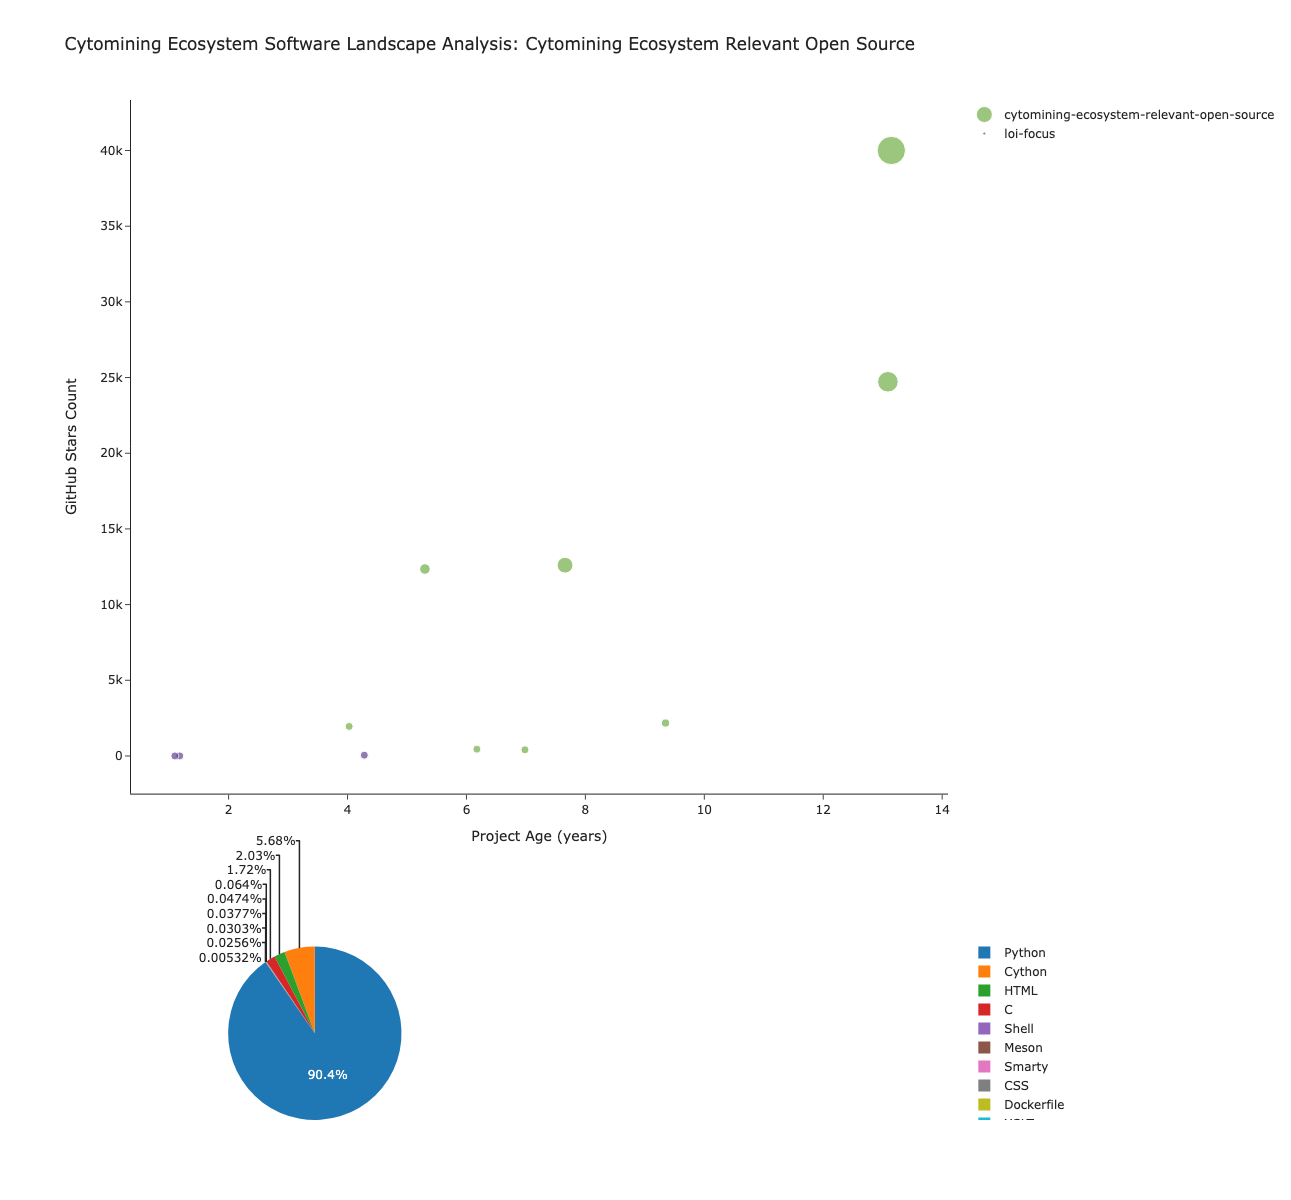

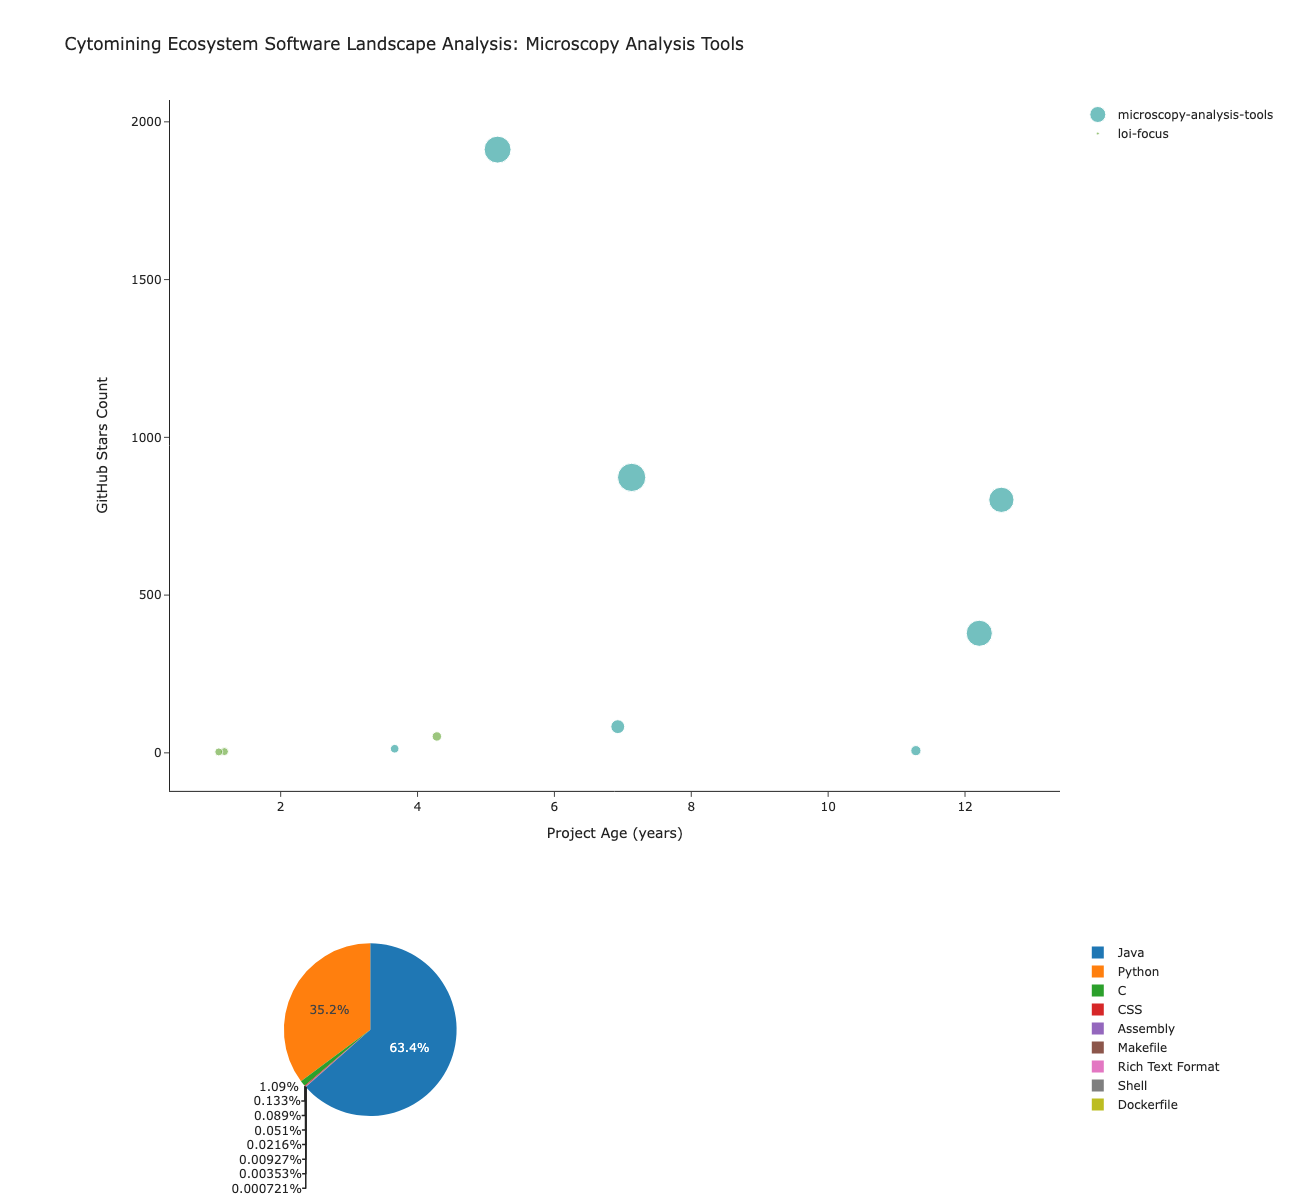

In [14]:
for category in (
    df_projects[df_projects["category"] != "loi-focus"]["category"].dropna().unique()
):
    target_df = df_projects[df_projects["category"].isin(["loi-focus", category])]
    category_title = category.replace("-", " ").title()
    create_plots_for_categories(target_df, category_title)

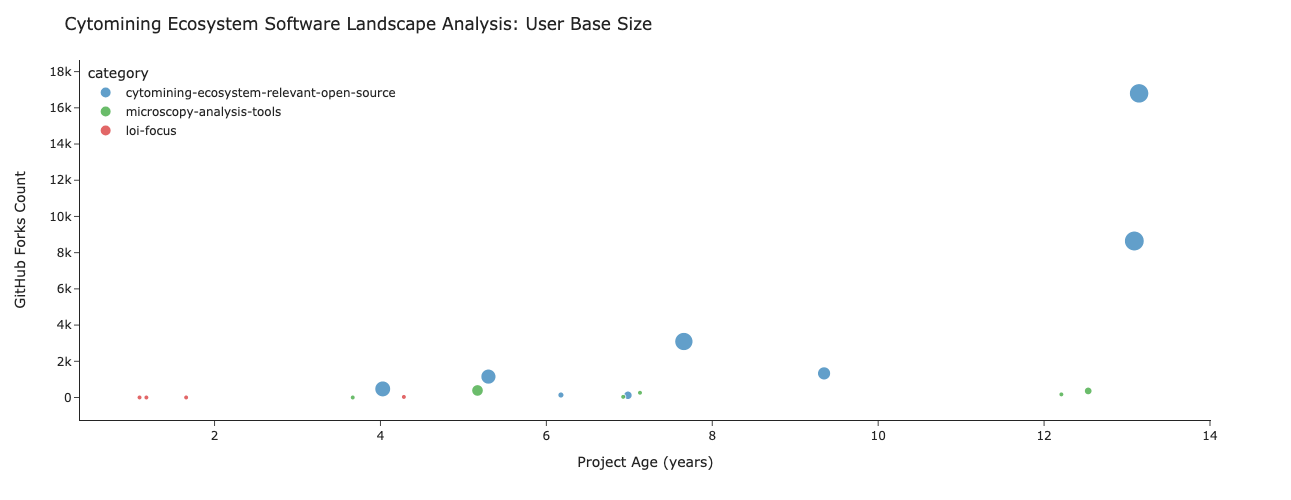

In [15]:
# bubble scatter plot
fig = px.scatter(
    df_projects,
    hover_name="Project Name",
    x="Duration Created to Now in Years",
    y="GitHub Forks",
    size="GitHub Contributors",
    color="category",
    width=1250,
    height=500,
)

# set a minimum size for the plot points
fig.update_traces(marker=dict(sizemin=5))

# customize the chart layout
fig.update_layout(
    title=f"{title_prefix}: User Base Size",
    xaxis_title="Project Age (years)",
    yaxis_title="GitHub Forks Count",
    # set legend placement over chart for space conservation
    legend=dict(x=0.005, y=1.0005, traceorder="normal", bgcolor="rgba(0,0,0,0)"),
)

# export to html
plot(fig, filename=f"{export_dir}/maturity.html", auto_open=False)

# Show the chart
fig.show()